# Final Project
### MODELADO DE DATOS CON REDES NEURONALES 
*Professor:* Michal Hemmerling \
*e-mail:* michal.hemmerling@udea.edu.co 

*Student:* Camilo José Torres Castaño \
*e-mail:* cjose.torres@udea.edu.co \
*C.c.* 1036401258

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 # For the circles

(100,)

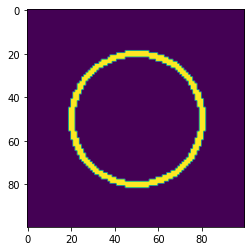

In [ ]:
fig,ax=plt.subplots(1,1)

img = np.zeros([100, 100])
color = (1, 0, 0)
cv2.circle(img, (50,50), 30, color,2)

ax.imshow(img[:,:])

img[0].shape

In [ ]:
def draw_circle(x,y,r,c,th):
    cv2.circle(img, center = (x,y), radius = r, color = c, thickness=th)

all_circle=[]
all_area=[]

ncircles=10000
for i in range(ncircles):   
    img = np.zeros([150, 150])
    x,y=np.random.randint(10,90,2)
    r=np.random.randint(10,30)
    c= (1, 0, 0)
    th=2    
    draw_circle(x,y,r,c,th) 
    
    #img_flat=img.reshape(1,img.size)
    all_circle.append(img)
    all_area.append(round(np.pi*r**2, 0))
    
all_circle_array=np.array(all_circle)    
all_area_array=np.array(all_area)

print(all_circle_array.shape)
print(all_area_array.shape)

(10000, 150, 150)
(10000,)


Text(0.5, 1.0, '908.0')

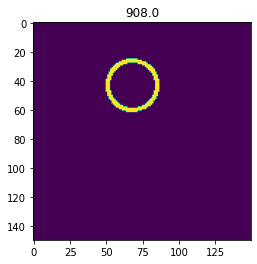

In [ ]:
fig,ax=plt.subplots(1,1)
idx=np.random.randint(0,ncircles)
ax.imshow(all_circle_array[idx])
ax.set_title(str(all_area_array[idx]))

In [ ]:
# Divide my data into X data and y data
X_data = all_circle_array
y_data = all_area_array

print("X_data shape: ",X_data.shape)
print("y_data shape: ",y_data.shape)

X_data shape:  (10000, 150, 150)
y_data shape:  (10000,)


In [ ]:
# Split my data into test and train samples
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

In [ ]:
# input_shape 

print("Shape of a single sample: ", X_train[0].shape)

Shape of a single sample:  (150, 150)


In [ ]:
# Import a sequential model
from tensorflow.keras.models import Sequential

# Import the models to solve the problems
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout,Conv2D, MaxPooling2D

# Import regularizers
from tensorflow.keras import regularizers

# Import optimizers
from tensorflow.keras import optimizers

# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Create a function with the Sequential model
def get_model1(units, input_shape = X_train[0].shape, dr = 0.2, wd=0.01):
    model = Sequential([
                        InputLayer(input_shape = input_shape, name='input'),
        
                        Conv2D(filters=64,kernel_size=1,  activation='relu'),
                        Conv2D(filters=64,kernel_size=1,  activation='relu'),
        
                        MaxPooling2D((2, 2)),
                        
                        Conv2D(filters=128,kernel_size=1,  activation='relu'),
                        Conv2D(filters=128,kernel_size=1,  activation='relu'),

                        MaxPooling2D((2, 2)),
                        
                        Conv2D(filters=256,kernel_size=1,  activation='relu'),
                        Conv2D(filters=256,kernel_size=1,  activation='relu'),
                        Conv2D(filters=256,kernel_size=1,  activation='relu'),

                        MaxPooling2D((2, 2)),

                        Conv2D(filters=512,kernel_size=1,  activation='relu'),
                        Conv2D(filters=512,kernel_size=1,  activation='relu'),
                        Conv2D(filters=512,kernel_size=1,  activation='relu'),

                        MaxPooling2D((2, 2)),

                        Conv2D(filters=512,kernel_size=1,  activation='relu'),
                        Conv2D(filters=512,kernel_size=1,  activation='relu'),
                        Conv2D(filters=512,kernel_size=1,  activation='relu'),
        
                        Flatten(),

                        Dense(units=units/2, activation='relu'),
                        Dropout(dr),
                        Dense(units=units, activation='relu'),
                        #Dropout(dr),

                        Dense(units=1, activation='linear')
                        
                        ])
    return model

In [ ]:
# Create a function with the Sequential model
def get_model():
    model = Sequential([
                        Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 1)),
                        MaxPooling2D((2, 2)),

                        Conv2D(filters=64,kernel_size=(3, 3),  activation='relu'),
                        MaxPooling2D((2, 2)),

                        Conv2D(filters=64,kernel_size=(3, 3),  activation='relu'),
                        MaxPooling2D((2, 2)),

                        Flatten(),

                        Dense(units=64, activation='relu'),
                        #Dropout(dr),
                        Dense(units=1, activation='linear')

                        ])
    return model

In [ ]:
# Intance a Sequen|tial model
model = get_model()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 25)      250       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 25)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        14464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
def compile_model(model, optimizer, loss):
    model.compile(optimizer=optimizer,
                  loss=loss, # For clasification problem with digits, not with one-hot encoding
                  metrics=[loss]
                 )

In [ ]:

#compile_model(model, optimizers.RMSprop(learning_rate=0.0001), 'mape')
compile_model(model, 'adam', ['mape'])

In [ ]:
epochs = 200
myhistory = model.fit(X_train, y_train, epochs=epochs, batch_size = 100, validation_split=0.15, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/200
68/68 [==============================] - 20s 124ms/step - loss: 52.5168 - mape: 52.5168 - val_loss: 31.7675 - val_mape: 31.7675
Epoch 2/200
68/68 [==============================] - 8s 118ms/step - loss: 27.3683 - mape: 27.3683 - val_loss: 25.4708 - val_mape: 25.4708
Epoch 3/200
68/68 [==============================] - 8s 116ms/step - loss: 24.5627 - mape: 24.5627 - val_loss: 24.4749 - val_mape: 24.4749
Epoch 4/200
68/68 [==============================] - 8s 116ms/step - loss: 24.0114 - mape: 24.0114 - val_loss: 24.5116 - val_mape: 24.5116
Epoch 5/200
68/68 [==============================] - 8s 116ms/step - loss: 23.6363 - mape: 23.6363 - val_loss: 24.2374 - val_mape: 24.2374
Epoch 6/200
68/68 [==============================] - 8s 118ms/step - loss: 23.3439 - mape: 23.3439 - val_loss: 23.7481 - val_mape: 23.7481
Epoch 7/200
68/68 [==============================] - 8s 116ms/step - loss: 22.9040 - mape: 22.9040 - val_loss: 23.5116 - val_mape: 23.5116
Epoch 8/200
68/68 [=======

In [ ]:
myhistory.history.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

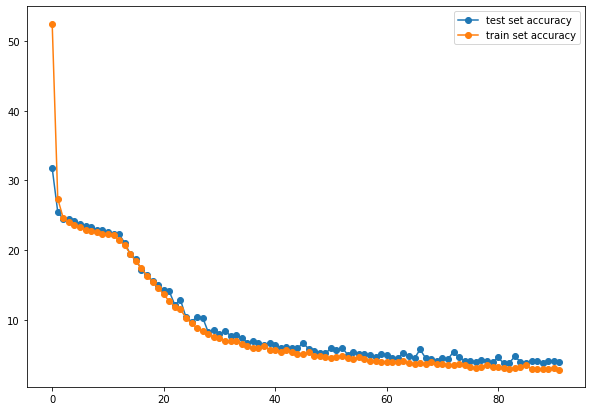

In [ ]:
xvals = range(len(myhistory.history['loss']))

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(xvals, myhistory.history['val_mape'], '-o', label='test set accuracy')
ax.plot(xvals, myhistory.history['mape'], '-o', label='train set accuracy')
ax.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('R2:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 43.081844161987306
MSE: 15328.17430800554
MAPE: 0.18788157583707982
R2: 0.9850118332990391
VarScore: 0.970273769319542


Text(0, 0.5, 'y_pred')

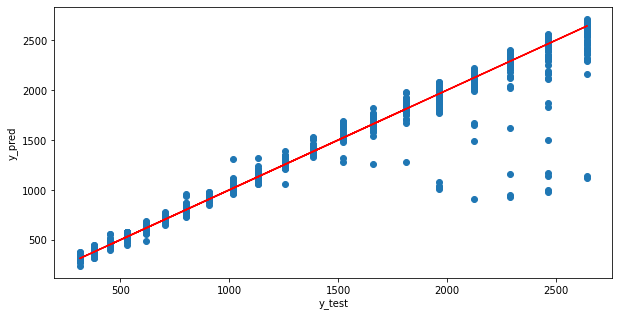

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
def draw_circle(x,y,r,c,th):
    cv2.circle(img, center = (x,y), radius = r, color = c, thickness=th)

all_circle=[]
all_area=[]

ncircles=10000
for i in range(ncircles):   
    img = np.zeros([150, 150])
    radious_list = []
    c= (1, 0, 0)
    th=1

    num_circles = np.random.randint(3,6)

    control = np.random.randint(1,6)

    for j in range(num_circles):
        x,y=np.random.randint(10,90,2)

        if(control == 1):
            r=np.random.randint(10,15)
        if(control == 2):
            r=np.random.randint(15,20)
        if(control == 3):
            r=np.random.randint(20,25)
        if(control == 4):
            r=np.random.randint(25,30)
        if(control == 5):
            r=np.random.randint(30,35)

        draw_circle(x,y,r,c,th) 
        radious_list.append(round(np.pi*r**2, 0))
    
    radious_list =np.array(radious_list)
    #img_flat=img.reshape(1,img.size)
    all_circle.append(img)
    all_area.append(radious_list.mean())
    
all_circle_array=np.array(all_circle)    
all_area_array=np.array(all_area)

print(all_circle_array.shape)
print(all_area_array.shape)

(10000, 150, 150)
(10000,)


Text(0.5, 1.0, '2213.0')

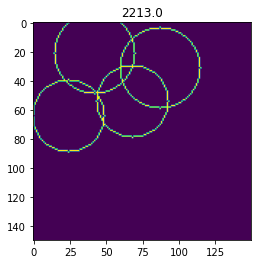

In [ ]:
fig,ax=plt.subplots(1,1)
idx=np.random.randint(0,ncircles)
ax.imshow(all_circle_array[idx])
ax.set_title(str(all_area_array[idx]))

In [ ]:
# Divide my data into X data and y data
X_data = all_circle_array
y_data = all_area_array

print("X_data shape: ",X_data.shape)
print("y_data shape: ",y_data.shape)

X_data shape:  (10000, 150, 150)
y_data shape:  (10000,)


In [ ]:
# Split my data into test and train samples
(X_train, X_test, y_train, y_test) = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

In [ ]:
# Intance a Sequen|tial model
units=2048
model = get_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 25)      250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        14464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
#compile_model(model, optimizers.RMSprop(learning_rate=0.0001), 'mape')
compile_model(model, 'adam', 'mape')

In [ ]:
epochs = 200
myhistory = model.fit(X_train, y_train, epochs=epochs, batch_size = 64, validation_split=0.15, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/200
107/107 [==============================] - 19s 83ms/step - loss: 40.7910 - mape: 40.7910 - val_loss: 26.5011 - val_mape: 26.5011
Epoch 2/200
107/107 [==============================] - 8s 74ms/step - loss: 27.1969 - mape: 27.1969 - val_loss: 25.9991 - val_mape: 25.9991
Epoch 3/200
107/107 [==============================] - 8s 74ms/step - loss: 26.6240 - mape: 26.6240 - val_loss: 25.6892 - val_mape: 25.6892
Epoch 4/200
107/107 [==============================] - 8s 79ms/step - loss: 26.3285 - mape: 26.3285 - val_loss: 24.9715 - val_mape: 24.9715
Epoch 5/200
107/107 [==============================] - 9s 85ms/step - loss: 26.3452 - mape: 26.3452 - val_loss: 25.6540 - val_mape: 25.6540
Epoch 6/200
107/107 [==============================] - 8s 77ms/step - loss: 26.2200 - mape: 26.2200 - val_loss: 25.4651 - val_mape: 25.4651
Epoch 7/200
107/107 [==============================] - 8s 76ms/step - loss: 26.5319 - mape: 26.5319 - val_loss: 26.6068 - val_mape: 26.6068
Epoch 8/200
107/107

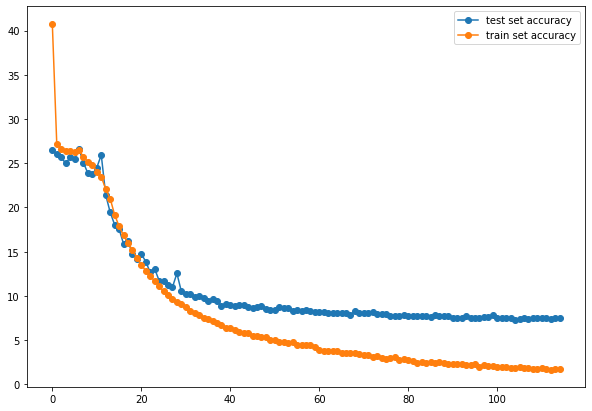

In [ ]:
xvals = range(len(myhistory.history['loss']))

fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(xvals, myhistory.history['val_mape'], '-o', label='test set accuracy')
ax.plot(xvals, myhistory.history['mape'], '-o', label='train set accuracy')
ax.legend()
plt.show()



In [ ]:
y_pred = model.predict(X_test)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('R2:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 118.27807211303711
MSE: 28211.408900340622
MAPE: 0.27074898530152647
R2: 0.9860817425932544
VarScore: 0.972408484635627


Text(0, 0.5, 'y_pred')

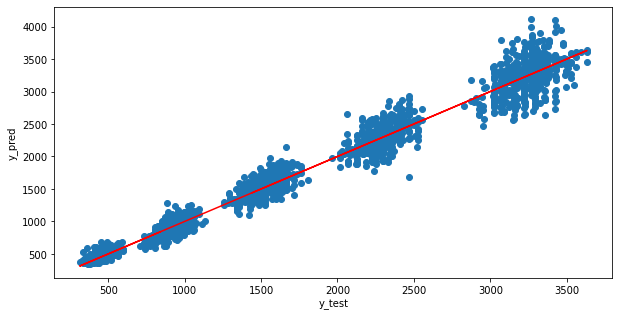

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')